In [77]:
%matplotlib inline

import gmaps
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)
gmaps.figure()

Figure(layout=FigureLayout(height='420px'))

In [80]:
crashes = pd.read_csv("Resources/Traffic_Crashes_-_Crashes.csv", low_memory=False)
crashes.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC193526,NaN,03/21/2019 12:50:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,0,5,3,41.808203,-87.704125,POINT (-87.704125461348 41.808203053915)
1,JC193531,NaN,03/21/2019 12:49:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,0,5,3,41.791284,-87.741697,POINT (-87.741696867821 41.791283705634)
2,JC193482,NaN,03/20/2019 10:35:00 PM,5,TRAFFIC SIGNAL,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,22,4,3,41.884390,-87.629599,POINT (-87.629599098569 41.884389603817)
3,JC193506,NaN,03/20/2019 10:00:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,3,41.685684,-87.603466,POINT (-87.603466225555 41.685683631223)
4,JC193468,NaN,03/20/2019 10:00:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,3,41.910866,-87.649665,POINT (-87.649664933008 41.910865686084)


In [81]:
# crashes["CRASH_DATE"].min()
crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,279796.000000,1.931910e+05,279796.000000,279792.000000,279268.000000,278743.000000,278743.000000,278743.000000,278743.000000,278743.000000,278743.000000,278743.0,279796.000000,279796.000000,279796.000000,278650.000000,278650.000000
mean,28.166189,1.365529e+01,3575.710446,1244.048854,2.020428,0.154095,0.000875,0.016890,0.082685,0.053644,2.030792,0.0,13.186300,4.124677,6.721461,41.857771,-87.671192
std,6.900005,3.005865e+03,2936.542364,712.902436,0.404804,0.507459,0.032243,0.152099,0.367931,0.295446,1.157882,0.0,5.419514,1.964987,3.594163,0.364627,0.745015
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.933994
25%,30.000000,2.000000e+00,1160.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,3.000000,41.787269,-87.719934
50%,30.000000,2.000000e+00,3100.000000,1214.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.878099,-87.671598
75%,30.000000,4.000000e+00,5501.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924699,-87.632561
max,99.000000,1.191625e+06,451100.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [82]:
crash_location = crashes.loc[:,"LATITUDE":"LONGITUDE"]
crash_location.dropna(how='any', inplace=True)
crash_location.rename(columns={"LATITUDE": "Lat", "LONGITUDE":"Lng"}, inplace=True)
crash_location["Region ID"] = ""
crash_location.head()

,Lat,Lng,Region ID
0,41.808203,-87.704125,
1,41.791284,-87.741697,
2,41.884390,-87.629599,
3,41.685684,-87.603466,
4,41.910866,-87.649665,


In [83]:
crash_location.describe()

,Lat,Lng
count,278650.000000,278650.000000
mean,41.857771,-87.671192
std,0.364627,0.745015
min,0.000000,-87.933994
25%,41.787269,-87.719934
50%,41.878099,-87.671598
75%,41.924699,-87.632561
max,42.022780,0.000000


In [84]:
target_url = (f"https://maps.googleapis.com/maps/api/geocode/json?address=Chicago&key={gkey}")
geo_data = requests.get(target_url).json()
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "Chicago",
                    "short_name": "Chicago",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Cook County",
                    "short_name": "Cook County",
                    "types": [
                        "administrative_area_level_2",
                        "political"
                    ]
                },
                {
                    "long_name": "Illinois",
                    "short_name": "IL",
                    "types": [
                        "administrative_area_level_1",
                        "political"
                    ]
                },
                {
                    "long_name": "United States",
                    "short_name": "US",
                    "types": [
 

In [85]:
lat_min = geo_data['results'][0]['geometry']['bounds']['southwest']['lat']
lat_max = geo_data['results'][0]['geometry']['bounds']['northeast']['lat']
lng_min = geo_data['results'][0]['geometry']['bounds']['southwest']['lng']
lng_max = geo_data['results'][0]['geometry']['bounds']['northeast']['lng']
print(f"Illinois spans latitude {lat_min} to {lat_max}.")
print(f"Illinois spans longitude {lng_min} to {lng_max}.")
print("We will need to discard any errant data that falls outside these bounds.")

Illinois spans latitude 41.6443349 to 42.023131.
Illinois spans longitude -87.9402669 to -87.52366099999999.
We will need to discard any errant data that falls outside these bounds.


In [86]:
i = 0
for index, row in crash_location.iterrows():
    if (crash_location["Lat"][index] < lat_min) | (crash_location["Lat"][index] > lat_max) | (np.isnan(crash_location["Lat"][index])) | (crash_location["Lng"][index] < lng_min) | (crash_location["Lng"][index] > lng_max) | (np.isnan(crash_location["Lng"][index])):
        print(f"Out of bounds: lat/lng {crash_location['Lat'][index]}, {crash_location['Lng'][index]}. Dropping record...")
        crash_location.drop(index, inplace=True)
        i += 1
print(f"Cleaning complete: {i} rows were dropped due to lat/lng outside bounds.")

Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bound

In [87]:
crash_location.describe()

,Lat,Lng
count,278630.000000,278630.000000
mean,41.860775,-87.677485
std,0.084790,0.057700
min,41.644670,-87.933994
25%,41.787279,-87.719936
50%,41.878101,-87.671605
75%,41.924701,-87.632562
max,42.022780,-87.524587


In [88]:
regions = pd.read_csv("Resources/Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Regions.csv", low_memory=False)
regions.head()
regions.describe()

,REGION_ID,WEST,EAST,SOUTH,NORTH,CURRENT_SPEED
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,-87.701910,-87.642355,41.824520,41.867706,22.871379
std,8.514693,0.068858,0.063614,0.099126,0.096047,4.484596
min,1.000000,-87.846210,-87.747456,41.644139,41.677477,12.270000
25%,8.000000,-87.747456,-87.674590,41.764066,41.822792,20.450000
50%,15.000000,-87.685372,-87.646438,41.822792,41.866129,23.180000
75%,22.000000,-87.647208,-87.606334,41.909269,41.931841,25.230000
max,29.000000,-87.584845,-87.524436,41.997946,42.026444,32.730000


In [89]:
region_location = regions.loc[:," REGION_ID":" NORTH"]
region_location.head()

,REGION_ID,WEST,EAST,SOUTH,NORTH
0,25,-87.747456,-87.662508,41.677477,41.728472
1,21,-87.606334,-87.566260,41.764066,41.822792
2,9,-87.775947,-87.747456,41.866129,41.909269
3,18,-87.747456,-87.683730,41.764066,41.822792
4,8,-87.674590,-87.619112,41.910561,41.960669


In [90]:
for index, row in crash_location.iterrows():
    for index2, row2 in region_location.iterrows():
        if ((crash_location["Lat"][index] < region_location[" NORTH"][index2]) & (crash_location["Lat"][index] > region_location[" SOUTH"][index2]) & (crash_location["Lng"][index] > region_location[" WEST"][index2]) & (crash_location["Lng"][index] < region_location[" EAST"][index2])):
            crash_location["Region ID"][index] = region_location[" REGION_ID"][index2]
crash_location.head()

C:\Users\Robert\AppData\Local\Continuum\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Lat,Lng,Region ID
0,41.808203,-87.704125,18
1,41.791284,-87.741697,18
2,41.884390,-87.629599,13
3,41.685684,-87.603466,26
4,41.910866,-87.649665,8


In [91]:
crash_final = crash_location['Region ID'].value_counts().to_frame()
crash_final.rename(columns={'Region ID': "crash_count"}, inplace=True)
crash_final

,crash_count
18,19143
11,15790
10,15473
13,14796
5,14040
8,13629
3,12572
23,12069
12,11851
6,11312


In [92]:
rl_cams = pd.read_csv("Resources/Red_Light_Camera_Locations.csv", low_memory=False)
rl_cams.head()

,INTERSECTION,FIRST APPROACH,SECOND APPROACH,THIRD APPROACH,GO LIVE DATE,LATITUDE,LONGITUDE,LOCATION
0,Pulaski-Diversey,SB,NB,NaN,05/15/2009,41.931791,-87.726979,"(41.931791, -87.726979)"
1,Pulaski-Foster,SB,WB,NaN,10/18/2007,41.975532,-87.728234,"(41.975532, -87.728234)"
2,Cicero-Fullerton,SB,WB,NaN,02/25/2006,41.924237,-87.746302,"(41.924237, -87.746302)"
3,Harlem-Belmont,NB,WB,NaN,06/18/2007,41.937997,-87.806746,"(41.937997, -87.806746)"
4,Narragansett-Fullerton,EB,WB,NaN,11/14/2008,41.923676,-87.785441,"(41.923676, -87.785441)"


In [93]:
rl_location = rl_cams.loc[:,"LATITUDE":"LONGITUDE"]
rl_location["LATITUDE"].dropna(how='any', inplace=True)
rl_location["LONGITUDE"].dropna(how='any', inplace=True)
rl_location.rename(columns={"LATITUDE": "Lat", "LONGITUDE":"Lng"}, inplace=True)
rl_location["Region ID"] = ""
rl_location.head()

,Lat,Lng,Region ID
0,41.931791,-87.726979,
1,41.975532,-87.728234,
2,41.924237,-87.746302,
3,41.937997,-87.806746,
4,41.923676,-87.785441,


In [94]:
for index, row in rl_location.iterrows():
    for index2, row2 in region_location.iterrows():
        if ((rl_location["Lat"][index] < region_location[" NORTH"][index2]) & (rl_location["Lat"][index] > region_location[" SOUTH"][index2]) & (rl_location["Lng"][index] > region_location[" WEST"][index2]) & (rl_location["Lng"][index] < region_location[" EAST"][index2])):
            rl_location["Region ID"][index] = region_location[" REGION_ID"][index2]
rl_location.head()

C:\Users\Robert\AppData\Local\Continuum\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Lat,Lng,Region ID
0,41.931791,-87.726979,7
1,41.975532,-87.728234,3
2,41.924237,-87.746302,7
3,41.937997,-87.806746,5
4,41.923676,-87.785441,5


In [95]:
rl_final = rl_location['Region ID'].value_counts().to_frame()
rl_final.rename(columns={'Region ID': "red_light_camera_count"}, inplace=True)
rl_final

,red_light_camera_count
5,15
7,14
6,13
18,12
10,10
3,10
11,9
8,8
2,7
14,6


In [96]:
speed_cams = pd.read_csv("Resources/Speed_Camera_Locations.csv", low_memory=False)
speed_cams.head()

,ADDRESS,FIRST APPROACH,SECOND APPROACH,GO-LIVE DATE,LATITUDE,LONGITUDE,LOCATION
0,3843 W 111th (Speed Camera),EB,WB,01/13/2014,41.691202,-87.717211,"(41.69120239624487, -87.71721139909997)"
1,19 W Chicago Ave (Speed Camera),WB,NaN,04/29/2014,41.896556,-87.629026,"(41.89655610710888, -87.62902590382873)"
2,2445 W 51st St (Speed Camera),EB,NaN,02/24/2014,41.801013,-87.686071,"(41.801012880525555, -87.68607060493738)"
3,7739 S Western (Speed Camera),NB,NaN,12/18/2013,41.752629,-87.682765,"(41.752629293489285, -87.68276525603093)"
4,3832 W 79th St (Speed Camera),EB,NaN,02/10/2014,41.749715,-87.719599,"(41.749715176851936, -87.71959877920995)"


In [97]:
speed_location = speed_cams.loc[:,"LATITUDE":"LONGITUDE"]
speed_location["LATITUDE"].dropna(how='any', inplace=True)
speed_location["LONGITUDE"].dropna(how='any', inplace=True)
speed_location.rename(columns={"LATITUDE": "Lat", "LONGITUDE":"Lng"}, inplace=True)
speed_location["Region ID"] = ""
speed_location.head()

,Lat,Lng,Region ID
0,41.691202,-87.717211,
1,41.896556,-87.629026,
2,41.801013,-87.686071,
3,41.752629,-87.682765,
4,41.749715,-87.719599,


In [98]:
for index, row in speed_location.iterrows():
    for index2, row2 in region_location.iterrows():
        if ((speed_location["Lat"][index] < region_location[" NORTH"][index2]) & (speed_location["Lat"][index] > region_location[" SOUTH"][index2]) & (speed_location["Lng"][index] > region_location[" WEST"][index2]) & (speed_location["Lng"][index] < region_location[" EAST"][index2])):
            speed_location["Region ID"][index] = region_location[" REGION_ID"][index2]
speed_location.head()

C:\Users\Robert\AppData\Local\Continuum\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Lat,Lng,Region ID
0,41.691202,-87.717211,25
1,41.896556,-87.629026,12
2,41.801013,-87.686071,18
3,41.752629,-87.682765,22
4,41.749715,-87.719599,22


In [99]:
speed_final = speed_location['Region ID'].value_counts().to_frame()
speed_final.rename(columns={'Region ID': "speed_camera_count"}, inplace=True)
speed_final

,speed_camera_count
18,22
5,16
10,14
3,10
6,10
11,8
22,8
8,8
15,7
2,7


In [100]:
merged_1 = crash_final.merge(rl_final, how='outer', left_index=True, right_index=True)
merged_df = merged_1.merge(speed_final, how='outer', left_index=True, right_index=True)
merged_df.fillna(0,inplace=True)
merged_df

C:\Users\Robert\AppData\Local\Continuum\anaconda3\envs\PythonData2\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '>' not supported between instances of 'numpy.ndarray' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,crash_count,red_light_camera_count,speed_camera_count
18,19143,12.0,22.0
11,15790,9.0,8.0
10,15473,10.0,14.0
13,14796,4.0,2.0
5,14040,15.0,16.0
8,13629,8.0,8.0
3,12572,10.0,10.0
23,12069,6.0,6.0
12,11851,3.0,2.0
6,11312,13.0,10.0


Text(0, 0.5, 'Traffic Crashes')

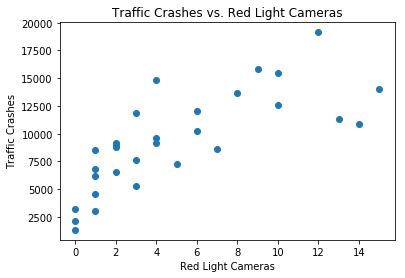

In [104]:
plt.scatter(merged_df['red_light_camera_count'],merged_df['crash_count'])
plt.title("Traffic Crashes vs. Red Light Cameras")
plt.xlabel("Red Light Cameras")
plt.ylabel("Traffic Crashes")

Text(0, 0.5, 'Traffic Crashes')

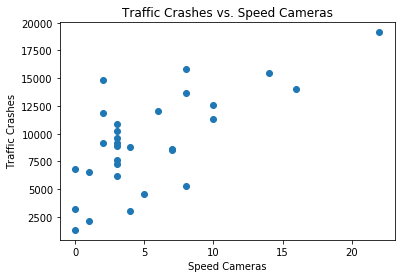

In [105]:
plt.scatter(merged_df['speed_camera_count'],merged_df['crash_count'])
plt.title("Traffic Crashes vs. Speed Cameras")
plt.xlabel("Speed Cameras")
plt.ylabel("Traffic Crashes")